This notebook will be mainly used for the capstone project

# 1. Introduction

Road accidents have become very common nowadays. As more and people are buying automobiles, the incidences of road accidents are just increasing day by day. 

As per WHO observatory data “Road traffic injuries are currently estimated to be the eighth leading cause of death across all age groups globally and are predicted to become the seventh leading cause of death by 2030”.

Analyzing an important array of factors, including weather conditions, speed, construction work, special events, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.

These perceptions, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where a severe accident can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.

Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Other attentive private companies could be investing in technologies aiming to improve road safeness.


# 2. Data

The data comes from [Seattle car accident set](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). A comprehensive dataset of 194,673 accidents occuring between 2004-2020. The dataset has 38 columns describing the details of each accident including the weather conditions, collision type, date/time of accisent and location.

Location,Weather,Lighting, type of intersection, road conditions, collision condition, drunk and driver and other information described in the dataset.

The following features are selected for the prediction

|Feature|Description|
|:--------|:-----------|
|INATTENTIONIND|Whether or not accident was due to inattention (Y/N)|
|UNDERINFL|Whether or not driver was in drug or alcohol (Y/N) |
|WEATHER|Weather condition|
|ROADCOND|Condition of the road|
|LIGHTCOND|Condition of the light|
|SPEEDING|Whether or not Speeding was a factor (Y/N)|


2.1 Pre-Processing 

The models aim was to predict the severity of an accident, considering that, the variable of Severity Code was in the form of 1 (Property Damage Only) and 2 (Injury Collision).

Featured data are pre processed to convert into continuous data. Encode accident was due to attention with 0 as No and 1 as Yes. Road conditions can be segregate into dry, mushy and wet. Dry as 0, Mushy as 1 and Wet as 2. Ice,Standing Water and oil are similar to wet then it encode as 2. Snow/Slush and Sand/Mud/Dirt are encode as 1. There are few data with 'Others', So it encode as 'Unknown'. Weather conditions are encode like clear as 0, Overcast and Cloudy as 1, Windy as 2 and Rain as 3. Light conditions are encode like Light as 0, Medium as 1 and Dark asa 2. Encoding under the influence No as 0 and Yes as 1.


2.2 Cleaning

Data cleaning is the process of detecting and removing the inaccurate values from the data set. Here to remove Unknown or Other values from the data set. The entire process of cleansing data to reduce almost 5000 records which is having incorrect data.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Data

In [16]:
main_data = pd.read_csv("/home/hema/data/coursera/Data-Collisions.csv")
main_data.head()

/home/hema/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [17]:
descriptive_stats = data.describe(include='all')
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


/home/hema/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


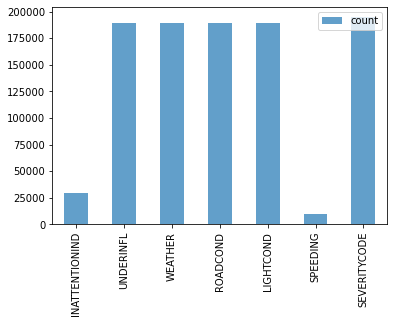

In [23]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()
descriptive_stats_plot.plot(kind='bar',alpha=0.70)




In [48]:
data['Year'] = data['INCDATE'].str[:4]

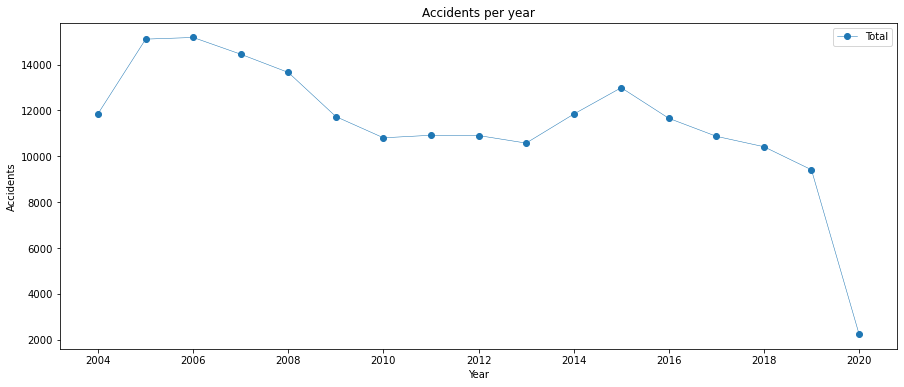

In [61]:
yearly_df = data[["Year","INCKEY"]].groupby("Year").count()
yearly_df['INCKEY'].plot.line(figsize=(15,6),marker='o',linewidth=0.5,label='Total')
plt.title("Accidents per year")
plt.ylabel("Accidents")
plt.legend()

In [27]:
# Data Pre-processing
# attention 0 = No 1 = Yes
data['INATTENTIONIND'].replace("Y",1,inplace=True)
data['INATTENTIONIND'].replace(np.nan,0,inplace=True)

In [29]:
# under the influence 0 = No 1 = Yes
data["UNDERINFL"].replace("N", 0, inplace=True)
data["UNDERINFL"].replace("Y", 1, inplace=True)

# Weather Conditions 0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
data["WEATHER"].replace("Clear", 0, inplace=True)
data["WEATHER"].replace("Raining", 3, inplace=True)
data["WEATHER"].replace("Overcast", 1, inplace=True)
data["WEATHER"].replace("Other", "Unknown", inplace=True)
data["WEATHER"].replace("Snowing", 3, inplace=True)
data["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
data["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
data["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
data["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
data["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

# Road Conditions 0 = Dry, 1 = Mushy, 2 = Wet
data["ROADCOND"].replace("Dry", 0, inplace=True)
data["ROADCOND"].replace("Wet", 2, inplace=True)
data["ROADCOND"].replace("Ice", 2, inplace=True)
data["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
data["ROADCOND"].replace("Other", "Unknown", inplace=True)
data["ROADCOND"].replace("Standing Water", 2, inplace=True)
data["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
data["ROADCOND"].replace("Oil", 2, inplace=True)

#Light Conditions 0 = Light, 1 = Medium, 2 = Dark
data["LIGHTCOND"].replace("Daylight", 0, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
data["LIGHTCOND"].replace("Dusk", 1, inplace=True)
data["LIGHTCOND"].replace("Dawn", 1, inplace=True)
data["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
data["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
data["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Speeding 0 = No, 1 = Yes
data["SPEEDING"].replace("Y", 1, inplace=True)
data["SPEEDING"].replace(np.nan, 0, inplace=True)

In [34]:
# feature selection
feature_data = data[["X","Y","INCKEY",'INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]
feature_data.shape

(194673, 10)

In [36]:
feature_data

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,-122.323148,47.703140,1307,0.0,0,1,2,0,0.0,2
1,-122.347294,47.647172,52200,0.0,0,3,2,1,0.0,1
2,-122.334540,47.607871,26700,0.0,0,1,0,0,0.0,1
3,-122.334803,47.604803,1144,0.0,0,0,0,0,0.0,1
4,-122.306426,47.545739,17700,0.0,0,3,2,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,309534,0.0,0,0,0,0,0.0,2
194669,-122.344526,47.690924,309085,1.0,0,3,2,0,0.0,1
194670,-122.306689,47.683047,311280,0.0,0,0,0,0,0.0,2
194671,-122.355317,47.678734,309514,0.0,0,0,0,1,0.0,2


In [46]:
print("Missing values in Light Condition" , data['LIGHTCOND'].isna().sum(),"\n"
"Missing values in Weather Condition " , data['WEATHER'].isna().sum(),"\n"
"Missing values in Road Condition " , data['ROADCOND'].isna().sum(),"\n"
"Missing values in Under Influence " , data['UNDERINFL'].isna().sum(),"\n"      
     )

Missing values in Light Condition 5170 
Missing values in Weather Condition  5081 
Missing values in Road Condition  5012 
Missing values in Under Influence  4884 

